In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2016-01.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2016-03.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2016-02.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-03.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-01.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-02.csv


In [30]:
df = pd.read_csv("/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-02.csv")
df = df.sample(frac=0.5)

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
526924,1,2015-02-07 09:19:16,2015-02-07 09:29:41,2,1.90,-73.978050,40.752731,1,N,-73.959129,40.768105,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
10759628,2,2015-02-02 21:51:16,2015-02-02 21:58:55,1,1.35,-73.990494,40.730949,1,N,-73.979271,40.746189,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
4996687,2,2015-02-02 21:13:14,2015-02-02 21:20:07,1,0.93,-73.983070,40.756096,1,N,-73.972008,40.761917,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
4829387,1,2015-02-02 16:08:44,2015-02-02 16:22:12,1,3.70,-73.873001,40.774197,1,N,-73.923744,40.761261,1,13.5,1.0,0.5,4.55,0.0,0.3,19.85
1398001,2,2015-02-19 13:52:13,2015-02-19 14:13:49,2,2.08,-73.988258,40.737461,1,N,-73.981361,40.759212,1,14.0,0.0,0.5,2.96,0.0,0.3,17.76


In [32]:
print(df.shape, df.columns)

(6225260, 19) Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [33]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [34]:
df['RateCodeID'].value_counts()
df['payment_type'].value_counts()
df['store_and_fwd_flag'].value_counts()

N    6168888
Y      56372
Name: store_and_fwd_flag, dtype: int64

In [35]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
df[['VendorID','RateCodeID','payment_type', 'store_and_fwd_flag' ]] = df[['VendorID','RateCodeID','payment_type', 'store_and_fwd_flag' ]].astype(str)

In [36]:
df.describe(include='all').T

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
VendorID,6225260,2,2,3252995,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_pickup_datetime,6225260,2037596,2015-02-26 18:51:24,16,2015-02-01,2015-02-28 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_dropoff_datetime,6225260,2040649,2015-02-15 00:00:00,79,2015-02-01,2015-03-31 13:16:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,6225260.0,NaN,NaN,NaN,NaT,NaT,1.669915,1.334097,0.0,1.0,1.0,2.0,9.0
trip_distance,6225260.0,NaN,NaN,NaN,NaT,NaT,24.849772,14100.605742,0.0,1.0,1.69,3.07,14731432.8
pickup_longitude,6225260.0,NaN,NaN,NaN,NaT,NaT,-72.519736,10.275745,-133.737961,-73.991913,-73.981781,-73.966698,35.220325
pickup_latitude,6225260.0,NaN,NaN,NaN,NaT,NaT,39.949112,5.662257,-27.777678,40.735191,40.752666,40.767338,404.866669
RateCodeID,6225260,7,1,6089699,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_and_fwd_flag,6225260,2,N,6168888,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_longitude,6225260.0,NaN,NaN,NaN,NaT,NaT,-72.567779,10.112682,-735.716675,-73.991333,-73.979805,-73.962219,0.0


In [37]:
df = df.drop_duplicates(keep='last')
df.shape

(6225260, 19)

In [38]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [39]:
# remove pickup and drops outside newyork city limits

df.drop(df.index[
        ~((df['pickup_latitude'].between(40.496115395170364, 40.91553277700258)) &
          (df['pickup_longitude'].between(-74.25559136315209, -73.7000090639354))) 
], inplace=True)

df.drop(df.index[
        ~((df['dropoff_latitude'].between(40.496115395170364, 40.91553277700258)) &
          (df['dropoff_longitude'].between(-74.25559136315209, -73.7000090639354))) 
], inplace=True)
df.shape

(6087331, 19)

In [40]:
df = df.reset_index()

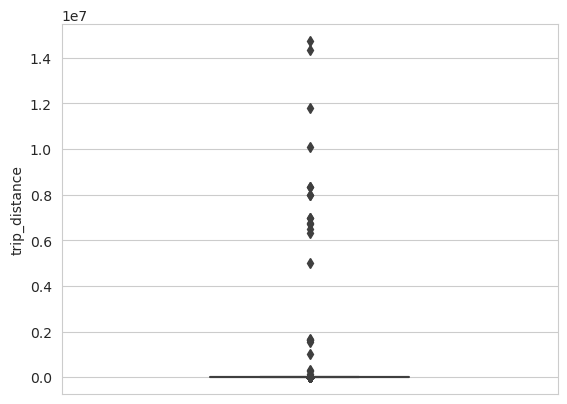

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt

def bplot(df, a):
    sns.set_style('whitegrid')
    sns.boxplot(y=a, data=df, width=0.4)
    plt.show()

bplot(df, 'trip_distance')

In [42]:
def computer_remove_outliers(df, x, remove_outlier=1):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    ll = q1 - 1.5*(iqr)
    ul = q3 + 1.5*(iqr)
    print('lower limit of dist is {} and upper limit of dist is {}'.format(ll, ul))

    # remove all negative distances and distances greater than upper limit
    if remove_outlier==1:
        df = df[(df[x]>ll) & (df[x]<ul)]
        df.shape
        return df

df = computer_remove_outliers(df, 'trip_distance')
df = df[df['trip_distance'] > 0]

lower limit of dist is -2.12 and upper limit of dist is 6.2


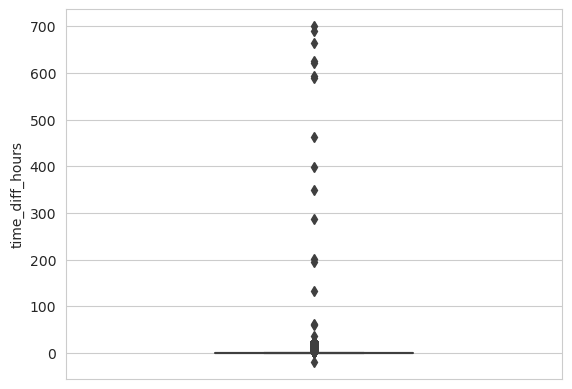

In [43]:
# identify outliers in date columns - trips more than n hours could be outliers.
df['time_diff_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype('timedelta64[h]')
df['time_diff_hours'] = df['time_diff_hours'].astype(int)
bplot(df, 'time_diff_hours')

(df['time_diff_hours'].value_counts().sort_values(ascending=False))
# based on above statement output, time diff greater than 1 can be neglected
df = df[df["time_diff_hours"] < 2]
df.shape

# remove cancelled rides
df['time_diff_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype('timedelta64[m]')
df[df['time_diff_min']==0]
df = df[df["time_diff_min"] > 0]  


In [44]:
# remove uncommon passenger counts
df["passenger_count"].value_counts(normalize=True).sort_values(ascending=False) * 100
df = df[(df["passenger_count"] <=2) & (df["passenger_count"] >0)]
df.shape

(4629679, 22)

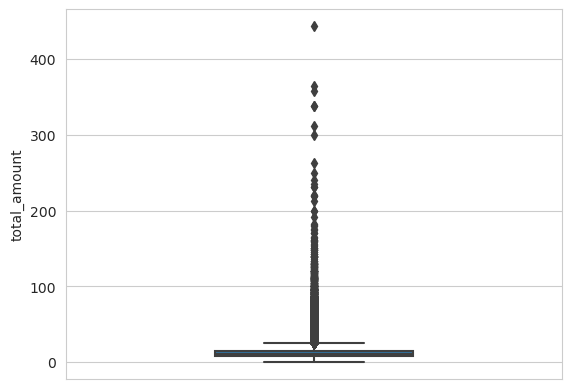

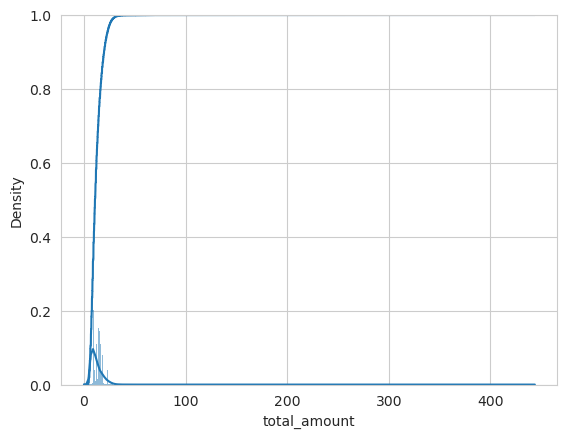

lower limit of dist is -1.8000000000000007 and upper limit of dist is 24.76


(4628815, 22)

In [45]:
df = df[(df['total_amount'] > 0) & (df['total_amount'] < 500)]
df.shape

df = df[df['extra'] >= 0]
df.shape

bplot(df, 'total_amount')

sns.set_style('whitegrid')
sns.histplot(kde=True, data=df['total_amount'], stat='density')
sns.ecdfplot(df['total_amount'])
plt.show()

computer_remove_outliers(df, 'total_amount', 0)

df = df[df['total_amount'] < 200]
df.shape

In [46]:
df_location = df[['pickup_latitude', 'pickup_longitude']]

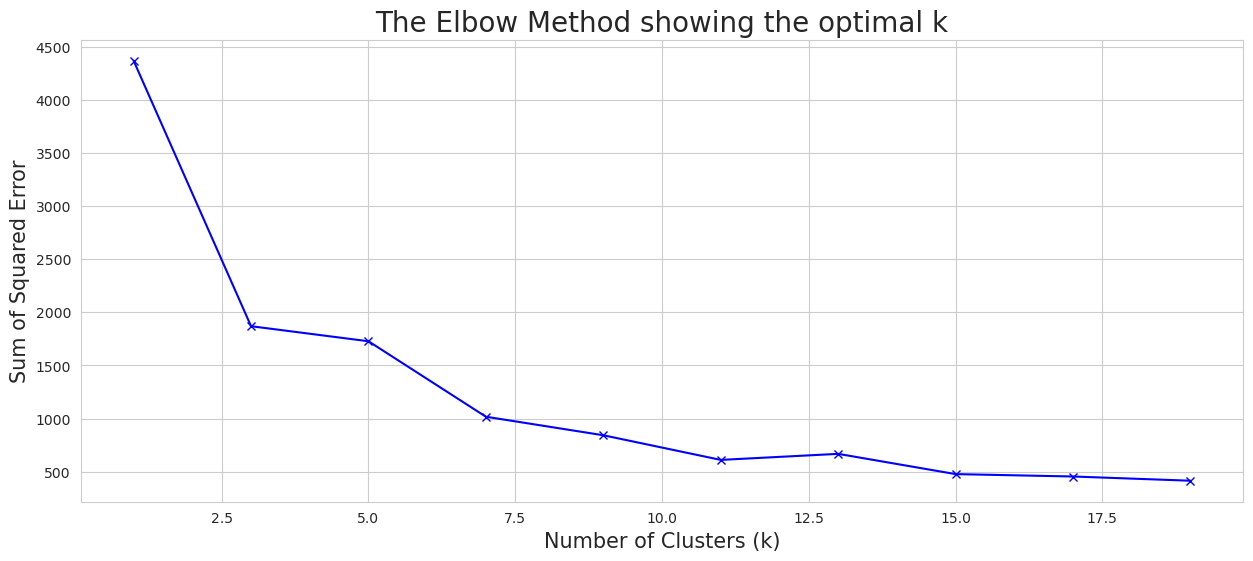

In [47]:
import cuml
import cudf
import numpy as np
#use gpu to make kmeans go faster
# Convert your pandas DataFrame to a cuDF DataFrame
gdf_location = cudf.DataFrame(df_location)

sse = []
K = range(1, 20, 2)

for k in K:
    kmeanModel = cuml.KMeans(n_clusters=k)
    kmeanModel.fit(gdf_location[['pickup_latitude', 'pickup_longitude']])
    sse.append(kmeanModel.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize=15)
plt.ylabel('Sum of Squared Error', fontsize=15)
plt.title('The Elbow Method showing the optimal k', fontsize=20)
plt.show()

In [48]:
df_location.dtypes

pickup_latitude     float64
pickup_longitude    float64
dtype: object

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


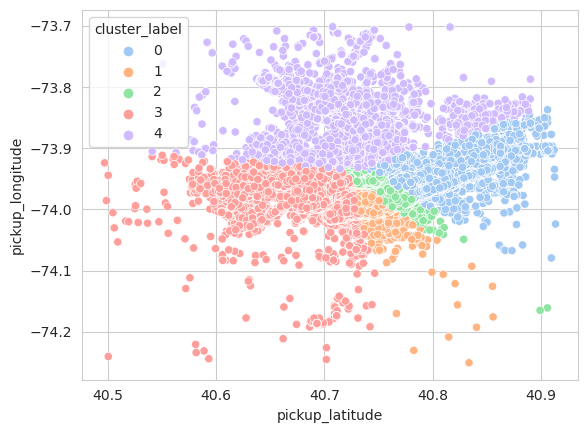

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5) 
df_location['cluster_label'] = kmeans.fit_predict(df_location)  
df_location['cluster_label'].value_counts().sort_values(ascending=False)

sns.set_style('whitegrid')
sns.scatterplot(x='pickup_latitude', y = 'pickup_longitude', data=(df_location),hue='cluster_label', palette='pastel')
plt.show()

In [51]:
df_with_loc_clusters = pd.merge(df_location, df, on=['pickup_latitude', 'pickup_longitude'])

In [52]:
df_with_loc_clusters['pickup_hour'] = df_with_loc_clusters["tpep_pickup_datetime"].dt.hour
df_with_loc_clusters['pickup_dayofweek'] = df_with_loc_clusters["tpep_pickup_datetime"].dt.dayofweek

In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_with_loc_clusters.head()

,pickup_latitude,pickup_longitude,cluster_label,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,time_diff_hours,time_diff_min,pickup_hour,pickup_dayofweek
0,40.752731,-73.978050,2,526924,1,2015-02-07 09:19:16,2015-02-07 09:29:41,2,1.90,1,N,-73.959129,40.768105,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0,10.0,9,5
1,40.752731,-73.978050,2,1789520,2,2015-02-21 06:18:08,2015-02-21 06:22:26,1,0.87,1,N,-73.990005,40.752235,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80,0,4.0,6,5
2,40.752731,-73.978050,2,526924,1,2015-02-07 09:19:16,2015-02-07 09:29:41,2,1.90,1,N,-73.959129,40.768105,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0,10.0,9,5
3,40.752731,-73.978050,2,1789520,2,2015-02-21 06:18:08,2015-02-21 06:22:26,1,0.87,1,N,-73.990005,40.752235,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80,0,4.0,6,5
4,40.730949,-73.990494,1,10759628,2,2015-02-02 21:51:16,2015-02-02 21:58:55,1,1.35,1,N,-73.979271,40.746189,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,0,7.0,21,0


In [54]:
df_model = df_with_loc_clusters.groupby(['pickup_dayofweek','pickup_hour', 'cluster_label']).size().reset_index()
df_model = df_model.rename(columns={0:'demand'})
df_model['demand'] = df_model['demand']/df_model['demand'].max()
df_model['demand'] = round((df_model['demand'] * 100), 2)
df_model.head()
df_model.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
pickup_dayofweek,840.0,3.000000,2.001192,0.00,1.0000,3.000,5.0000,6.0
pickup_hour,840.0,11.500000,6.926311,0.00,5.7500,11.500,17.2500,23.0
cluster_label,840.0,2.000000,1.415056,0.00,1.0000,2.000,3.0000,4.0
demand,840.0,34.495488,27.944762,0.46,6.2225,31.615,58.5825,100.0
